Step5 ‘5_graph_models’:This notebook visualizes the relationships between genres and the words they share using graph models. It creates individual genre graphs and highlights "middle words"—words with high probabilities across multiple genres. By leveraging tools like NetworkX and Matplotlib, the notebook provides a visual way to explore connections between genres and identify shared linguistic patterns in song lyrics.

In [1]:
import json

# Define the path to the JSON file
topic_models_path = '../data/models/topic_models_nostopwords.json'

# Open and load the JSON file
with open(topic_models_path, 'r') as file:
    topic_models = json.load(file)

# Iterate over each topic in topic_models
for topic, words in topic_models.items():
    # Sort words by percentage in descending order and get the top 10
    top_words = sorted(words.items(), key=lambda item: item[1], reverse=True)[:10]
    
    # Print the topic and its top 10 words
    print(f"Topic: {topic}")
    for word, percent in top_words:
        print(f"  {word}: {percent}")
    print()  # Blank line between topics for readability

Topic: rock
  know: 0.01208772250939899
  like: 0.010470906784314468
  time: 0.008937193494026092
  oh: 0.008756261610672457
  love: 0.00875205389245493
  never: 0.008644757077908006
  one: 0.008274477874765682
  see: 0.007913666037612793
  go: 0.007846342546132371
  got: 0.007027941352823484

Topic: rb
  know: 0.022522515811351396
  love: 0.021878887655599342
  like: 0.017795126602552166
  yeah: 0.0166538785300844
  baby: 0.016004290854371682
  oh: 0.014460775184558884
  got: 0.013589195390311311
  get: 0.011135363046506605
  let: 0.010550585150366137
  want: 0.01020195323266711

Topic: rap
  like: 0.02547880922448938
  got: 0.016341425641241903
  know: 0.014328830928229331
  get: 0.01379296304402042
  yeah: 0.011957052043168994
  bitch: 0.008511356109293782
  go: 0.007899143411188077
  see: 0.007029539626230333
  back: 0.006771421445912608
  cause: 0.006537297349962445

Topic: misc
  one: 0.008196599467922271
  said: 0.006395790601195268
  like: 0.0062090097317787935
  would: 0.00605

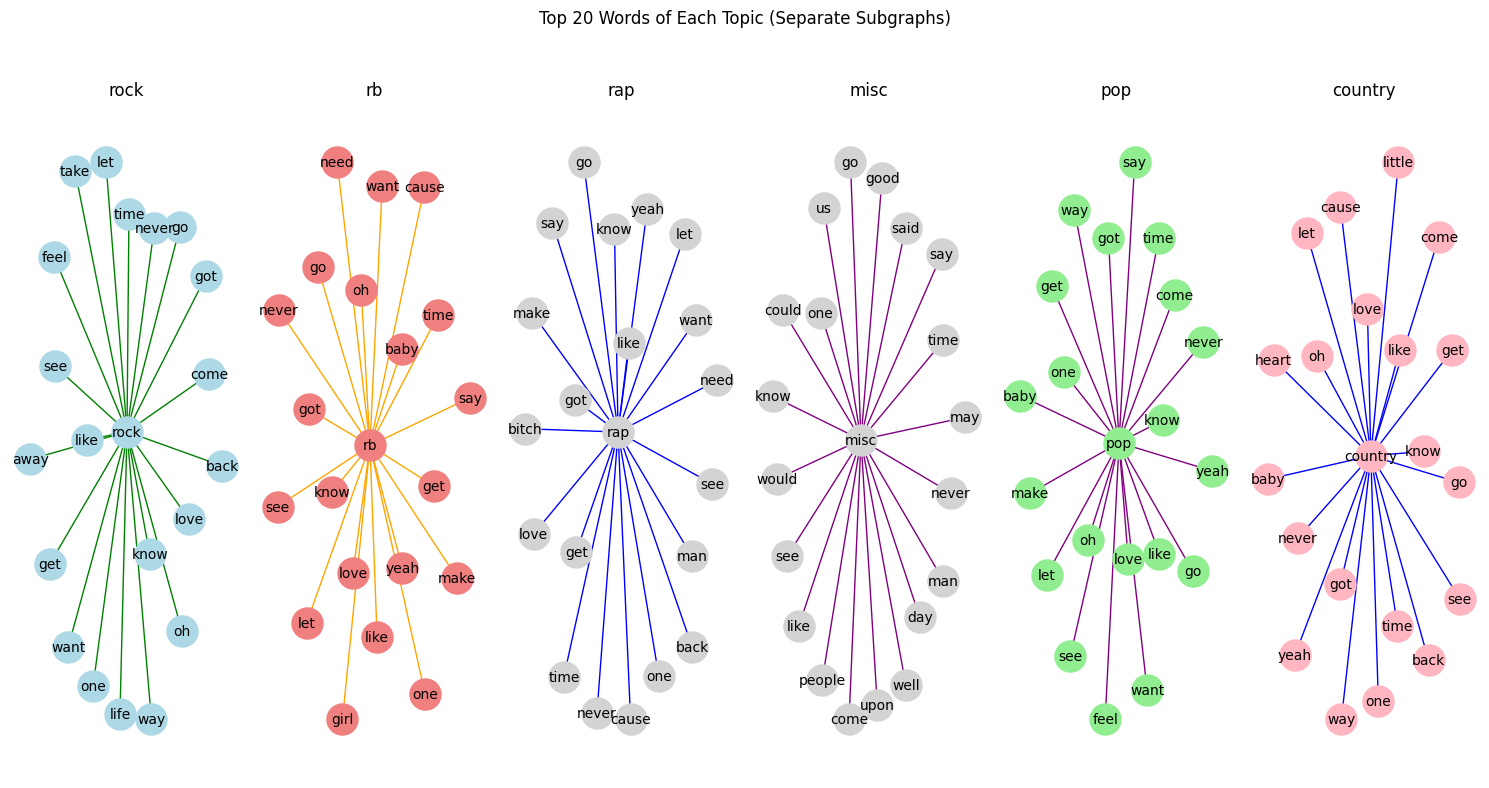

In [2]:
# Import necessary libraries
import networkx as nx
import matplotlib.pyplot as plt
import random

# Generate individual graphs for each topic without interconnections
fig, axes = plt.subplots(1, len(topic_models), figsize=(15, 8), squeeze=False)

# Loop through each topic to create separate subgraphs on individual axes
for i, (topic, words) in enumerate(topic_models.items()):
    # Create a new graph for each topic
    subgraph = nx.Graph()
    
    # Add edges between the topic and each of the top 20 words
    top_words = sorted(words.items(), key=lambda item: item[1], reverse=True)[:20]
    for word, weight in top_words:
        subgraph.add_edge(topic, word, weight=weight)
    
    # Draw each subgraph on a separate subplot with a unique color
    pos = nx.spring_layout(subgraph, seed=i)
    nx.draw(subgraph, pos, with_labels=True, node_size=500, font_size=10, 
            edge_color=random.choice(["blue", "green", "orange", "purple", "red"]),
            node_color=random.choice(["lightblue", "lightgreen", "lightcoral", "lightpink", "lightgrey"]),
            ax=axes[0, i])
    
    # Set subplot title to the topic name
    axes[0, i].set_title(topic)

# Show plot
plt.suptitle("Top 20 Words of Each Topic (Separate Subgraphs)")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


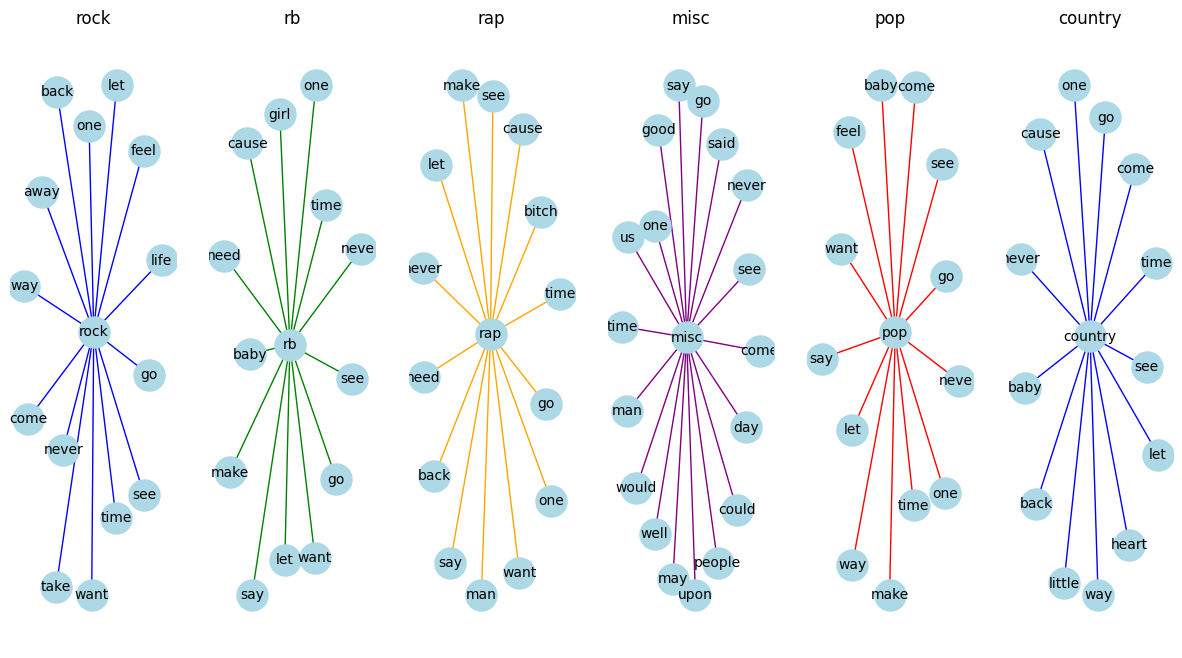

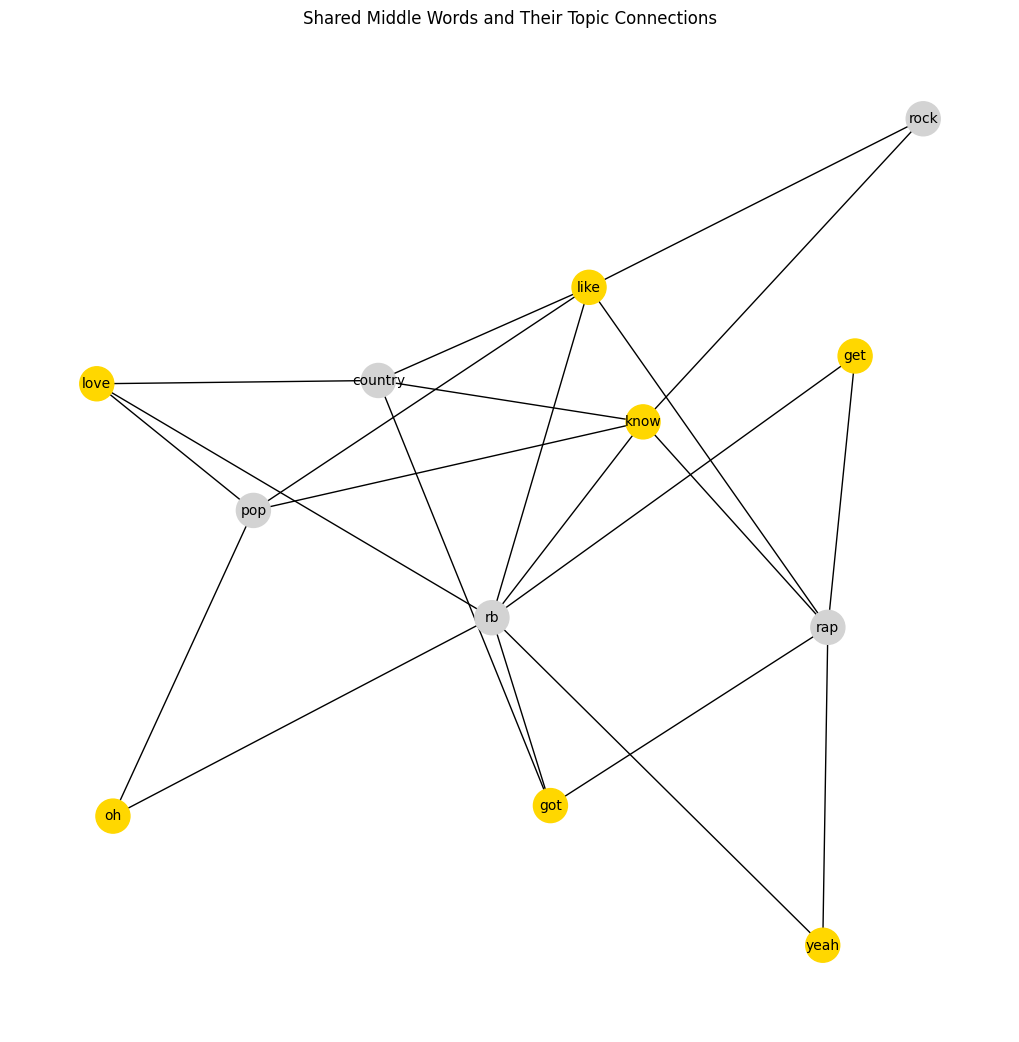

Middle words appearing in multiple topics above the threshold:
like: rap, pop, rb, rock, country
know: rap, pop, rb, rock, country
got: country, rap, rb
get: rap, rb
love: country, pop, rb
yeah: rap, rb
oh: pop, rb


In [3]:
# Import necessary libraries
import networkx as nx
import matplotlib.pyplot as plt

# Define a threshold value for high probability
threshold = 0.01  # Adjust as needed

# Identify words that appear with high probability in two or more topics
middle_words = {}
for topic, words in topic_models.items():
    for word, weight in words.items():
        if weight > threshold:
            if word not in middle_words:
                middle_words[word] = {topic}
            else:
                middle_words[word].add(topic)

# Filter to keep only words that appear in multiple topics
middle_words = {word: topics for word, topics in middle_words.items() if len(topics) > 1}

# Generate graphs for each topic individually
fig, axes = plt.subplots(1, len(topic_models), figsize=(15, 8), squeeze=False)
topic_colors = ["blue", "green", "orange", "purple", "red"]  # Define colors for each topic
middle_word_color = "gold"  # Unique color for middle words

# Create individual topic graphs without middle words
for i, (topic, words) in enumerate(topic_models.items()):
    subgraph = nx.Graph()
    subgraph.add_node(topic)  # Central node for the topic
    
    # Add edges between the topic and each of the top 20 words (excluding middle words)
    top_words = sorted(words.items(), key=lambda item: item[1], reverse=True)[:20]
    for word, weight in top_words:
        if word not in middle_words:
            subgraph.add_edge(topic, word, weight=weight)
    
    # Draw the topic subgraph on its subplot
    pos = nx.spring_layout(subgraph, seed=i, center=(0, 0))  # Center the topic node
    nx.draw(subgraph, pos, with_labels=True, node_size=500, font_size=10,
            edge_color=topic_colors[i % len(topic_colors)],
            node_color="lightblue", ax=axes[0, i])
    axes[0, i].set_title(topic)

# Create a new figure to plot middle words and their connections to topics
plt.figure(figsize=(10, 10))
shared_graph = nx.Graph()

# Add middle words as nodes and connect them to relevant topics
for word, topics in middle_words.items():
    shared_graph.add_node(word, color=middle_word_color)  # Middle word as a unique node
    for topic in topics:
        shared_graph.add_edge(word, topic)  # Connect to each associated topic

# Position nodes with a spring layout for clarity
pos = nx.spring_layout(shared_graph, seed=42)
node_colors = [middle_word_color if node in middle_words else "lightgrey" for node in shared_graph.nodes()]

# Draw shared middle word connections with customized styling
nx.draw(shared_graph, pos, with_labels=True, node_size=600, font_size=10,
        node_color=node_colors, edge_color="black")

plt.title("Shared Middle Words and Their Topic Connections")
plt.show()

# Print all middle words with shared topics
print("Middle words appearing in multiple topics above the threshold:")
for word, topics in middle_words.items():
    print(f"{word}: {', '.join(topics)}")
